# Data driven customer churn prediction for SyriaTel company

* ## Business understanding

## Overview

In the telecommunications industry, customer churn refers to the loss of subscribers who stop using a company's service during a specific period. Customer churn is also refered to as customer attrition or subscriber churn. There are two forms of customer churn; voluntary churn and involuntary churn. Voluntary churn involves consumers leaving on their own due to various factors e.g. poor customer service, better options elsewhere etc. On the other hand involuntary churn involves the service provider deliberately disconnecting some subscribers due to one reason or the other. High churn rates typically have adverse effects on telecomm companies, both to their reputation and to their balance sheet. It is therefore my initiative to attempt to use the historical data available and machine learning algorithms so as to be able to predict which subscribers will leave and also the churn rate, within that specified period under review. The insights gain from this will enable us to effective advice management, and help develop a strategic response and a prevetative measure.


## Business problem

High churn rates are one of the major risks that telecomm companies face all over the world. There are multiple causes of customer churn, and SyriaTel company just like any other company in other industries is affected by the 5 forces that can affect a companies profitability. These are what we call the 'Porters 5 forces' and include:
1. Competitive rivalry
2. Threat of substitutes
3. Threat of new market entrants
4. Buyer power
5. Supplier power

Basically, these forces coming from different directions and from different sources but eventually if the company does not take decisive and strategic measures to neutralize them, each one has the same final adverse result, which include reduced profitability, shrinking market share, financial distress among other things. It is therefore imperative, for SyriaTel to develop a strategy to ensure that it reduces the risk of suffering from customer churn, and indeed the most effective solution has to be data-driven. Studies have shown that indeed it costs more to acquire a new customer compared to what it costs just to retain the one's in a company's customer base. Due to such factors and the related risks, it is important to apply Machine learning so as to proactively determine the customers who are at risk, and in turn take the necessary measure to mitigate that risk.


* ##  Data understanding

The dataset being used is sourced from Kaggle, specifically the "SyriaTel Customer Churn" dataset. It can be found at the following link:
https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

For this section of the project, we will be using the "SyriaTel Customer Churn" dataset from Kaggle. The dataset contains various features related to customer demographics, service usage, and churn status. It is a valuable resource for analyzing customer behavior and predicting churn in the telecommunications industry. I will rely on this dataset to build a predictive model that can help identify customers at risk of churn and suggest strategies to retain them.

In [30]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

1. Loading the dataset, and converting it to a pandas DataFrame.

In [31]:
# Loading the dataset
churn_data = pd.read_csv('syriatel_customerchurn.csv')

2. To check the general structure of the dataset and its metadata.

In [32]:
# Display the structure of the dataset

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 rows and 21 columns, with the target variable 'Churn' being categorical.

Float datatypes = 8

Integer datatypes = 8

Object datatypes = 4

Boolean datatypes = 1

In [33]:
# Display the first 5 rows of the dataset

churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


3. Next we check the summary statistics of the colums with numerical values, and the unique values of the categorical columns.

In [34]:
# Summary statistics of numerical columns

churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


This enables us to inspect the details of the values within each column such as the standard deviation, the maximum and minimum values, the mean, and the total count of the non_null values in each column.

It is impportant to note that there are no missing values in any other columns within our dataset, this is quite a relief as we will not have to perform any extreme imputations that might affects integrity of our data.

* ## Data preparation

## Data cleaning

The process of data cleaning involves utilizing data science techniques for removing unnecessary and irrelevant columns, handling missing data through effective imputation, fixing inconsistent labels, removing duplicates etc.

Removing the unnecessary columns i.e. irrevelant data.

In [35]:
# Removing unnecessary columns
churn_data.drop(columns=['phone number', 'state', 'area code'], inplace=True)

In [36]:
churn_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [37]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

Check whether there are any duplicate values, within our dataset.

In [38]:
# Checking for duplicate Values

churn_data.duplicated().sum()

0

There are no duplicate values within our dataset, as the output of our analysis above shows that there are 0 true duplicate rows within our dataset.

Our next step is to deal with the categorical variables in our dataset. We will convert them into numerical values using Label Encoding, which is a common technique for handling categorical data in machine learning.

In [39]:
# Converting categorical variables to numerical values
categorical_cols = churn_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    churn_data[col] = le.fit_transform(churn_data[col])

# Display the first 5 rows after encoding categorical variables
churn_data.head()



,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Coverting boolean datatype to integer datatype

In [40]:
# Convert boolean to integer
churn_data['churn'] = churn_data['churn'].astype(int)

Checking the effect of the conversion on the first 5 rows of the dataset

In [41]:
churn_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### EXPLORATORY DATA ANALYSIS

#### Visualizing the Categorical Variables

#### Univariate analysis

Univariate analysis is known to be the simplest form of data analysis because it enables one to examine one variable at a time to understand its distribution, central tendency, and spread etc.

#### Univariate analysis of the Categorical variables

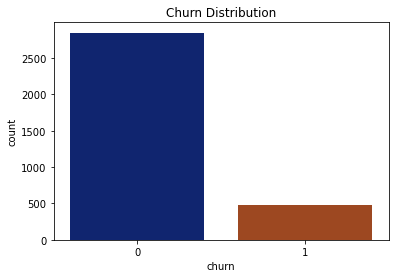

In [43]:
# Checking the distribution of the target variable 'churn'

sns.countplot(x='churn', data=churn_data, palette='dark')
plt.title("Churn Distribution")
plt.show()


Here we can clearly see that majority of the subscribers did not churn and only about 15% of the customer base of SyriaTel company churned. Below we can further check the exact number of subscribers who churned.

In [46]:
churn_data["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: int64

The exact number of subscribers who churned is 483 out of 3,333, which means that approximately 14.5% of the customer base of SyriaTel company churned. This indicates that the majority of subscribers did not churn, with 2,850 remaining loyal to the company.

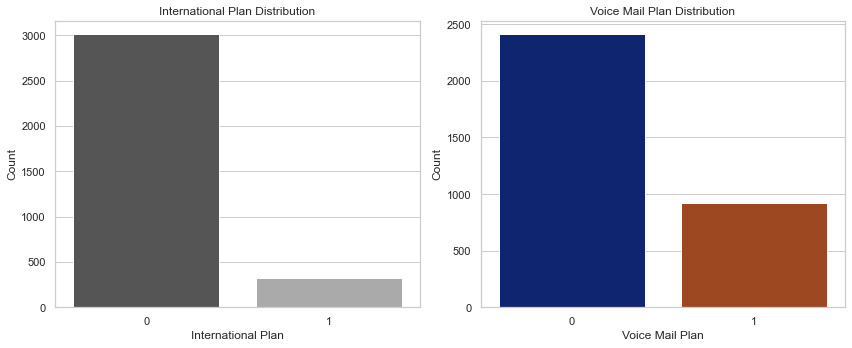

In [49]:
# Set a consistent style
sns.set(style="whitegrid")

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: International Plan
sns.countplot(x='international plan', data=churn_data, ax=axes[0], palette='gray')
axes[0].set_title('International Plan Distribution')
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Count')

# Second plot: Voice Mail Plan
sns.countplot(x='voice mail plan', data=churn_data, ax=axes[1], palette='dark')
axes[1].set_title('Voice Mail Plan Distribution')
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()


A significant number of the subscribers have no international plan as compared to those who do have.
This variance as significant comparative to that of the voice mail plan.

In [51]:
# Percentage of subscribers with an international plan
international_plan_percentage = (churn_data["international plan"].value_counts(normalize=True) * 100).round(2)
international_plan_percentage

0    90.31
1     9.69
Name: international plan, dtype: float64

We can observe that the percentage of subscribers without an international plan is 90.3% while those with one is 9.7%. This indicates that a significant number of subscribers don't have an international plan.

In [52]:
# Percentage of subscribers with voice mail plan
voice_mail_plan_percentage = (churn_data["voice mail plan"].value_counts(normalize=True) * 100).round(2)
voice_mail_plan_percentage

0    72.34
1    27.66
Name: voice mail plan, dtype: float64

We can observe that the percentage of subscribers without a voice mail plan is 72.3% while those with it is 27.7%. Evidently there is a greater variance as compared to the international plan adoption by subscribers.

#### Univariate analysis of the Numerical variables

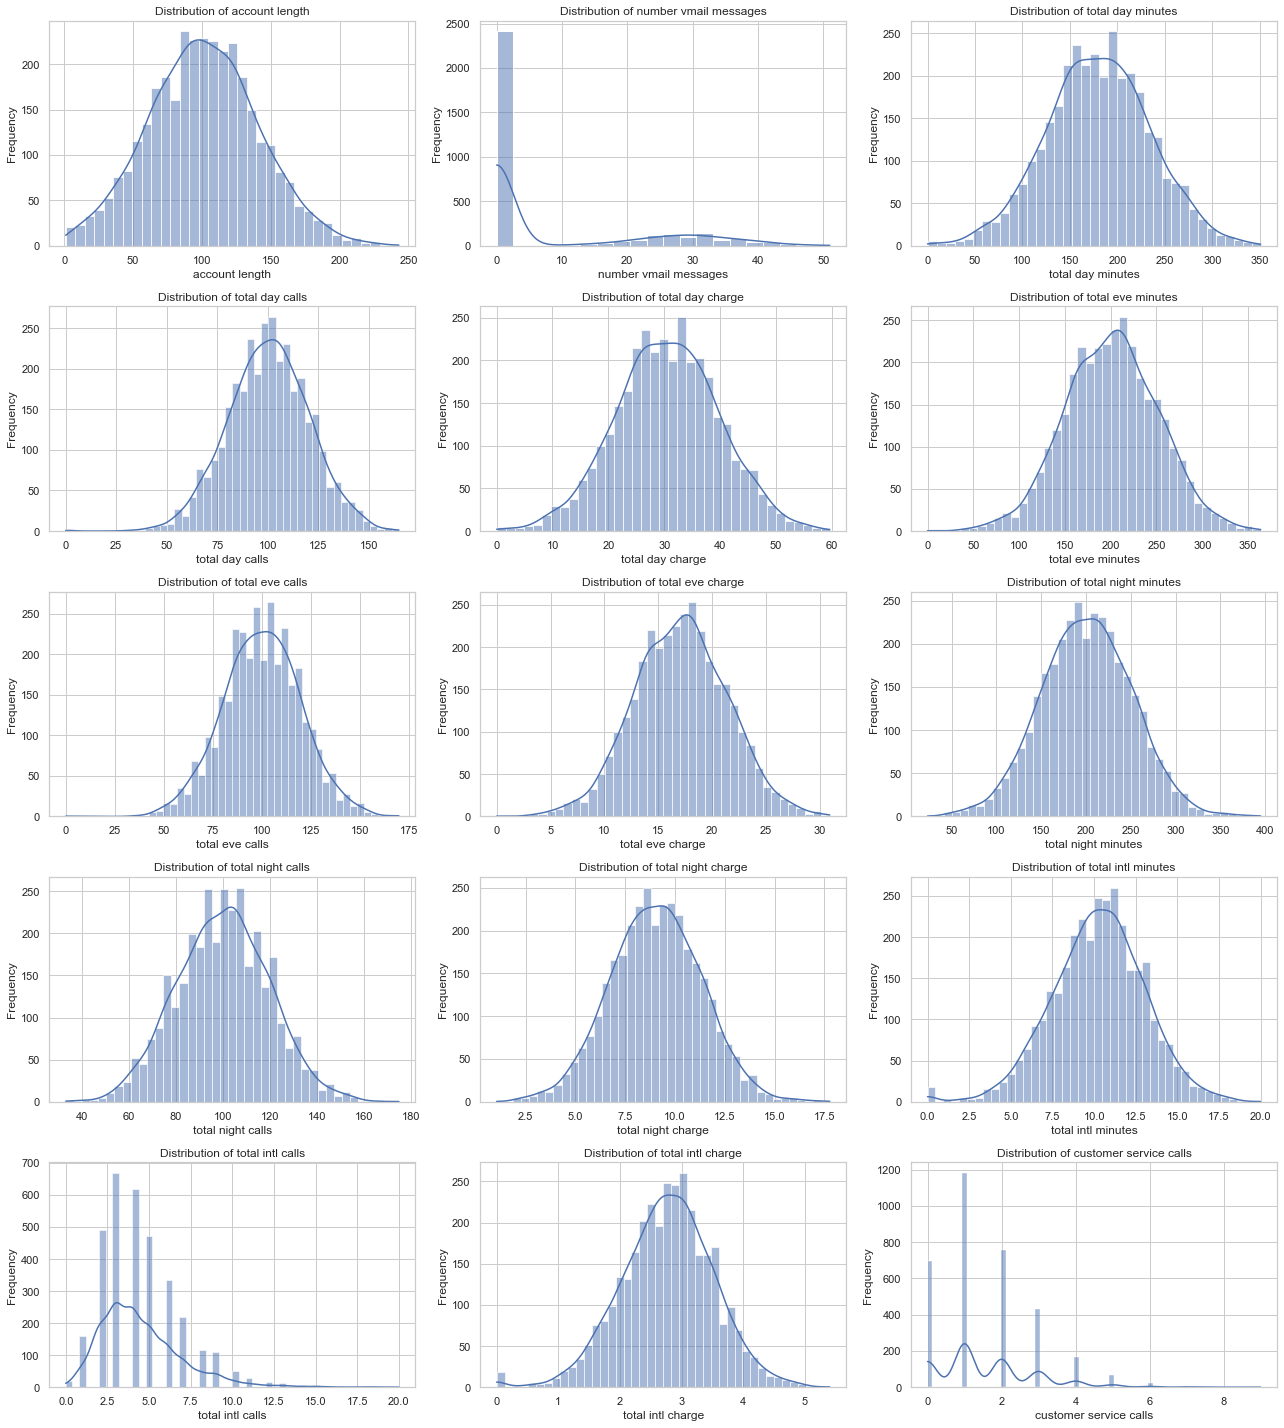

In [54]:
# Drop non-numerical/categorical columns
num_columns = churn_data.drop(columns=['voice mail plan', 'international plan', 'churn'], axis=1).columns

# Number of plots
n_cols = 3
n_rows = -(-len(num_columns) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Loop through columns
for i, col in enumerate(num_columns):
    sns.histplot(data=churn_data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### Distribution of the Numerical variables in our dataset.

Here I will explain what the visualization shows, in terms of the shape, spread, and other statistics. The histograms display the distribution of each numerical variable in the dataset. The KDE (Kernel Density Estimate) line provides a smoothed estimate of the distribution, allowing us to see the underlying patterns more clearly. 



1. *Distribution of account length* - This variable has a distribution that closely approaches a normal distribution, most subscribers has accounts of between roughly 50 to 150 days, and there are no extreme outliers. 

2. *Distribution of number of Voice mail messages* - This variable has a distribution that is highly reight-skewed, and we can observe that most customers have 0 voice mail messages. Very few have more than 20 v-mail messages.

3. *Distribution of total day minutes* - This variable has a normal distribution, we can observe that subscribers talk roughly 150 to 250 minutes during the day. Theres a small skewness and the mean and median are roughly the same.

4. *Distribution of total day calls* - This variable has a near normal distribution, total daily calls are clustering around 100 calls per day.

5. *Distribution of total day charge* - This variable has a normal distribution (bell-shaped)

6. *Distribution of total evening minutes* - The variable has a normal distribution, most subscribers are in the 150 to 250 minutes range.

7. *Distribution of total evening calls* - This variable has a symmetric distribution and is centered around 100 evening calls, it's slightly less spead than day calls.

8. *Distribution of total evening charge* - This variable has distribution that is quite similar to total evening minutes, which suggests a linear relationship.

9. *Distribution of total night minutes* - This variable also has a normal distribution, with very few outliers. The range of the minutes is between 100 and 350

10. *Distribution of total calls* - This variable has a distribution that is symmetrical as well, and the mean is around 100 being slightly spread.

11. *Distribution of total night charges* - The distribution of this variable closely mirrors that of the total night minutes, being a normal one and centered.

12. *Distribution of total international minutes* - This variable has a distribution that is slightly right-skewed. Most of the values are clustering at under 15 minutes, and there are some high outliers approximate at around 20 minutes.

13. *Distribution of total international calls* - This variable has a distribution that is right-skewed, most customers have very few international calls.

14. *Distribution of total international charges* - This variable has a distributions is almost exactly similar to that of the total international minutes distribution, having a moderate skewness.

15. *Distribution of customer service calls* - This variable has a distribution that can be described as being 'very spiky' and right-skewed. Most suscribers calls 0 to only 1 time, while some call up to 9 times or more.

#### Multivariate Analysis

Here we will explore the relationships between multiple variables in the dataset. This can help us understand how different features interact with each other and their impact on the target variable (churn). This is helpful for identifying patterns and correlations that may not be evident when looking at individual variables.

Firstly, we will exlore and attempt to understand how the number of churned subscribers relates to the international plan variables. This will help us understand if there is a significant relationship between the international plan and churn rates.

#### Churn of subscribers by International plan

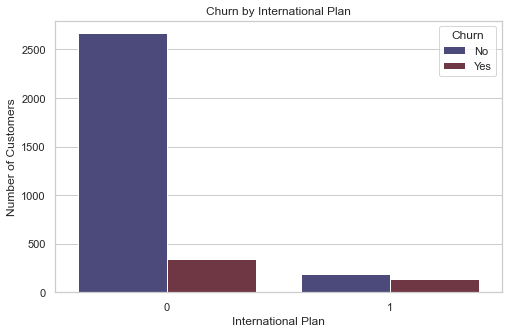

In [56]:
# Plotting the relationship between churn and international plan

plt.figure(figsize=(8, 5))
sns.countplot(data=churn_data, x='international plan', hue='churn', palette='icefire')
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


* Our observation is, that a significant number of subscribers do not have an international plan, as compared to those who do, and that the churn rate is higher among those who have an international plan. 
* Therefore even though fewer people have an international plan, those who do are more likely to churn. 
* This indicates that the international plan may be a factor influencing churn rates, and further analysis could be beneficial to understand this relationship better.

Secondly, we will exlore and attempt to understand how the number of churned subscribers relates to the voice mail plan variables. This will help us understand if there is a significant relationship between the voice mail plan and churn rates.

#### Churn of subscribers by voice-mail plan

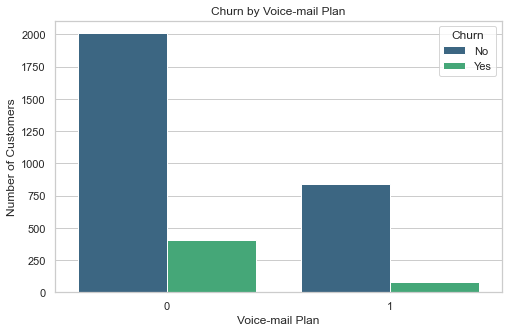

In [57]:
# Plotting the relationship between churn and voice mail plan

plt.figure(figsize=(8, 5))
sns.countplot(data=churn_data, x='voice mail plan', hue='churn', palette='viridis')
plt.title('Churn by Voice-mail Plan')
plt.xlabel('Voice-mail Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

* Our observation is that a significant number of subscribers do not have a voice-mail plan, and that the churn rate is quite low among those who do not have a voice-mail plan. 
* We can further observe that few of the subscribers have a voice-mail plan, and that the churn rate among them is significantly small. 
* This is indicative of the fact that the there is a lower likelihood of the subscribers churning if they have a voice-mail plan.

#### Inspection of the relation between the target variable; Churn and the numerical variables in the dataset

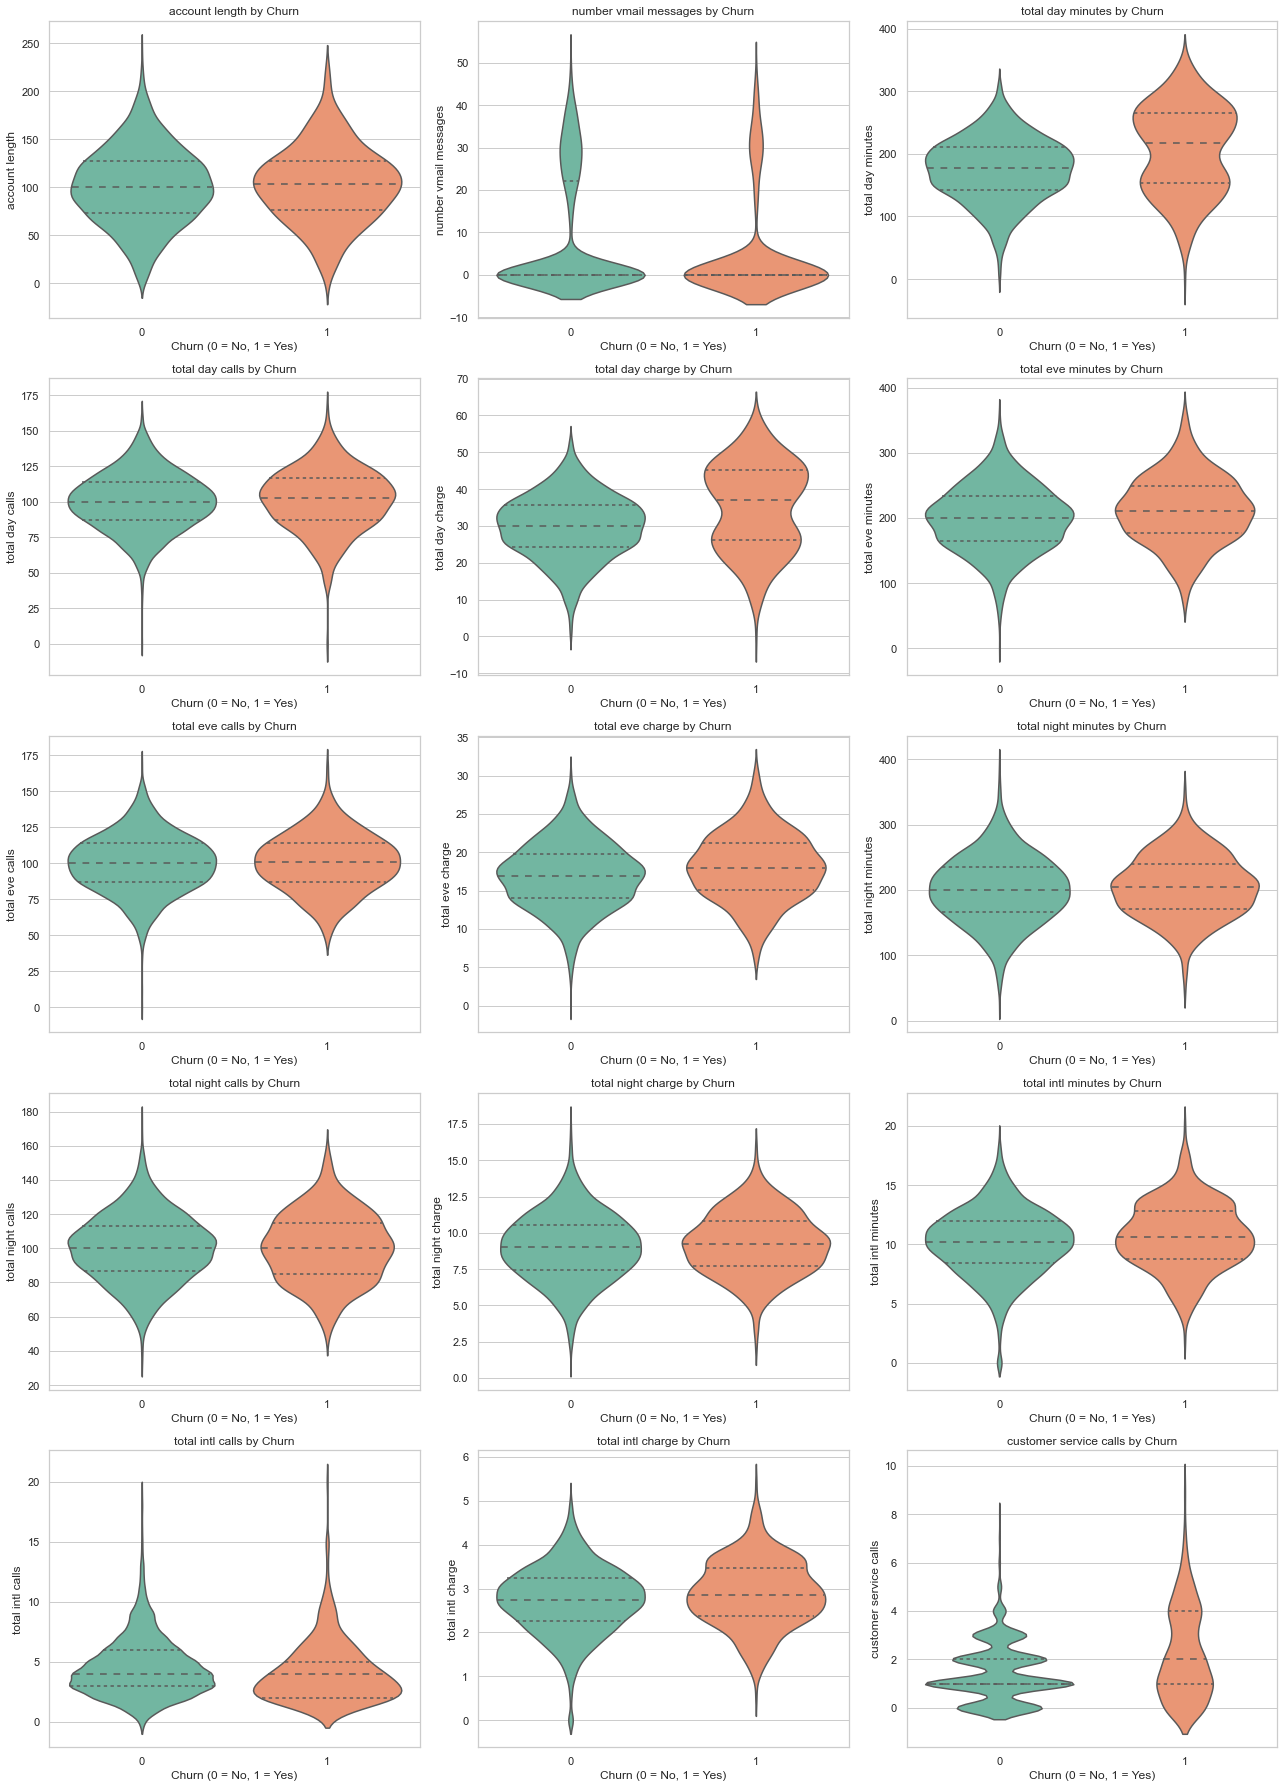

In [58]:
# Number of columns and rows for subplot grid
n_cols = 3
n_rows = math.ceil(len(num_columns) / n_cols)

# Set up the subplot figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Plot violin plots for each numerical column
for col, ax in zip(num_columns, axes):
    sns.violinplot(data=churn_data, x='churn', y=col, ax=ax, palette='Set2', inner='quartile')
    ax.set_title(f'{col} by Churn')
    ax.set_xlabel('Churn (0 = No, 1 = Yes)')
    ax.set_ylabel(col)

# Hide any unused axes
for ax in axes[len(num_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()




1. *Account length* - For this variable the distribution the subscribers who churned is quite similar to that of the ones who did not churn, we can therefore infer that account length is not a good predictor for subscriber churn.

2. *Number of voice-mail messages* - For this variable we can observe that churning subscribers have fewer voicemail messages. Non-churning subscribers have a wide spead inclusiving of subscribers with more than 20 messages.

3. *Total day minutes* - For this variable we can observe that subscribers who churn generally have higher day usage. This indicates to us that subscribers who are heavy on daytime use have high likelihood of churning.

4. *Total evening minutes* - For this variable we see almost identical distributions for both groups. It can be observed that evening usage is not indicative of churn likelihood.

5. *Customer service calls* - For this variable we can observe that the distributions have a significant difference. We see that subscribers who churn do contact customer care much more often. This indicates that high customer service engagement is highly linked to subscriber churn, which in turn prompts us look into the core reasons that make them to contact customer case to begin with.

6. *Total day charge* - This variable is quite similar to that of total day minutes, which is expected since charge is derived from usage. Here we observe that subscribers who churn are those who have higher charges, which might be same reason that compels them to churn.



### Correlation analysis

For this stage we will use a correlation heatmap which will enable us to see how strongly each numerical feature correlates with our target variable 'churn'.

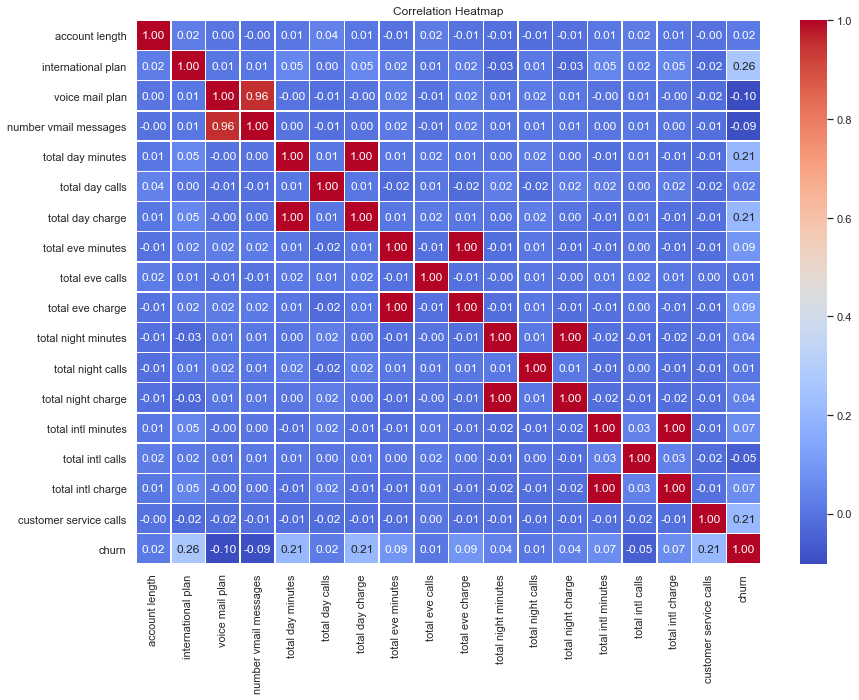

In [59]:
# Compute correlation matrix

corr_matrix = churn_data.corr()

# Plot the correlation heatmap

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()            

* The output of our correlation heatmap shows perfect positive correlation between variables such as total day minutes to total day charges, total international minutes to total international charges, this expected but it is redundancy.
* Variables such as customer service calls & international plans have the highest positive correlation and so might the most useful predictive features for our model.
* Variables with very low correlation (near 0) might indicate no predictive value and so might be irrelevant for our model. We should consider removing the low-impact variables within our model.


- It is necessary for us to drop on of each of the variables that are creating redundancy as this will enable us to mitigate the risk of muulticollinearity 



#### Refine features based on our correlation heatmap


In [60]:
# Compute the absolute correlation matrix for numerical features
corr_matrix_abs = churn_data.corr().abs()

# Select the upper triangle of the correlation matrix to avoid duplicate checks
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

# Identify columns that are highly correlated (correlation > 0.95)
dropped_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]

# Drop the identified highly correlated columns from the dataset
churn_data.drop(columns=dropped_cols, inplace=True)


#### Train Test and split the data

In [62]:
# Define features and the target variable
X = churn_data.drop(columns='churn')
y = churn_data['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Appying SMOTE for classification imbalance

The use of SMOTE (Synthetic Minority Over-Sampling Technique) is necessary when working with a dataset like ours whereby there is a significant imbalance between the two classes of our target variable.

From our analysis and visualization we are able to see that there is a cosiderable imbalance between the rate of subscribers who churned and those that did not.
 
SMOTE enables us to create synthetic examples of the minority class in our training data so as to help or model learn patterns better. This is because the imbalance can easily and significantly affect the performance of our model, especially for model algorithms such as Logistic regression, which are typically sensitive to class imbalance.

In [63]:
# Applying SMOTE to our training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [66]:
# Separate the categorical and numerical columns from our feature dataset X

categorical_columns = ['international plan', 'voice mail plan']
numerical_columns = X.drop(categorical_columns, axis=1).columns

# Initialize Scaler
scaler = StandardScaler()

# Fit only numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_scaled_resampled = scaler.transform(X_train_resampled[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Combine the scaled numerical columns and categorical columns into one DataFrame
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_columns), X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_train_scaled_resampled = pd.concat([pd.DataFrame(X_train_scaled_resampled, columns=numerical_columns), X_train_resampled[categorical_columns].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_columns), X_test[categorical_columns].reset_index(drop=True)], axis=1)

In [ ]:
churn_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


* ## Modeling and evaluation

* ## Conclusion